In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio #To make a gif

In [2]:
def euclidean_distance(x1, x2):
  """
  This function computes the euclidean_distance between two points.
  We use the np.sum() command to sum over all possible dimensions (1D,2D,3D,...nD)
  """
  return np.sqrt(np.sum((x2-x1)**2))

class KMeans:

  """
  K-means clustering is a unsupervised machine learning algorithm that groups data points into k distinct clusters based
  on their similarity. The algorithm works:

  1) Assign k centroids randomly (representative points)
  2) Iteratively update the centroids based on the distance of each data point from the centroid.

  The algorithm converges when the centroids no longer change or when a specified number of iterations is reached.
  Once the algorithm has converged, each data point is assigned to the nearest centroid and forms a cluster.
  K-means clustering can be used for data segmentation, image processing and anomaly detection.
  """

  def __init__(self, K, max_iters, plot_steps=False):

    """
    Define a class constructor for K-means clustering algorithm that initializes the values for
    the number of clusters, maximum iterations, and a bolean to plot the intermediate steps which will
    be used to generate a gif.

    It initializes an empty list to store the sample indices for each cluster and an empty list for
    the mean vectors (centroids) for each cluster.
    """

    self.K=K
    self.max_iters=max_iters
    self.plot_steps=plot_steps

    #List of sample indices for each cluster
    self.clusters=[[] for _ in range(self.K)]

    #The centers (mean vector) for each cluster
    self.centroids=[]

  def predict(self, X):

    """
    Predict method grabs the input data X. It initializes the K centroids randomly from the
    input data and optimizes the clusters by iterating over a maximum number of iterations.
    In each iteration, it assigns each sample to the closest cluster centroid, and updates
    the centroids by computing the mean of all samples in each cluster.

    The method checks whether the algorithm has converged by comparing the new and old centroid
    positions. If the distance is 0, it has converged. Then the method exits and returns the
    cluster labels for each sample based on the closest centroid.
    """

    self.X=X
    self.n_samples, self.n_features=X.shape

    #Randomly choose K sample indices without replacement from the n_samples
    random_sample_idxs=np.random.choice(self.n_samples, self.K, replace=False)
    #Selects K random data points (samples) from X and assign them as initial centroids.
    self.centroids=[self.X[idx] for idx in random_sample_idxs]
    #Each centroid is a sample from the input data with the index (X[idx]) selected randomly from random_sample_idxs

    #Optmize clusters:
    for _ in range(self.max_iters):
        #assign samples to closest centroids
        self.clusters=self._create_clusters(self.centroids)

        if self.plot_steps:
          self.plot()

        #calculate new centroids from clusters
        centroids_old=self.centroids
        self.centroids=self._get_centroids(self.clusters)

        if self._is_converged(centroids_old, self.centroids):
          break

        if self.plot_steps:
          self.plot()

    #Classify samples as the label of their clusters
    return self._get_cluster_labels(self.clusters)

  #Helper functions:

  def _get_cluster_labels(self, clusters):
    """
    It iterates over each cluster and for each sample index in the cluster, assigns the cluster
    index as the label for that sample. Finally, returns the labels array with the assigned cluster
    labels.
    """
    labels=np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx]=cluster_idx
    return labels

  def _create_clusters(self, centroids):

    """
    Takes the centroids of each cluster and assigns each sample to its closest centroid
    by calculating the euclidean distance between the sample and each centroid.
    It returns a list of clusters where each cluster contains the indices of the samples
    assigned to that centroid.
    """
    clusters=[[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx=self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):

    """
    Calculates the euclidean distance between the sample and each centroid using
    the euclidean distance helper function and returns the index of the centroid with
    the minimum distance as the closest_idx
    """
    distances=[euclidean_distance(sample, point) for point in centroids]
    closest_idx=np.argmin(distances)
    return closest_idx

  def _get_centroids(self, clusters):
    """
    Computes the new centroids (mean) for each cluster.
    axis=0 computes the mean of each feature dimension separately.
    It assigns the resulting mean vector as the centroid for the cluster in the centroids array
    """
    centroids=np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean=np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx]=cluster_mean
    return centroids

  def _is_converged(self, centroids_old, centroids):
    
    """"
    Distances between the old and new centroids for all centroids.
    This function is to check whether the model has converged.
    """
    distances=[euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances)==0

  def plot(self):
    
    fig, ax=plt.subplots(figsize=(7,4))
    for i, index in enumerate(self.clusters):
      point=self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)

    ax.set_ylabel("y-axis")
    ax.set_xlabel("X-axis")
    ax.legend(fontsize=8)
    ax.set_title("KMeans clustering")
    ax.grid("True")
    figs.append(fig)
    plt.show()

  def create_gif(self):
    writer = PillowWriter(fps=100)
    with imageio.get_writer("Animation.gif", mode='I') as writer:
        for fig in figs:
            fig.canvas.draw()  # Draw the canvas to update the figure
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            writer.append_data(image)

            if fig==figs[-1]:
              for i in range(30):
                fig.canvas.draw()  # Draw the canvas to update the figure
                image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
                image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
                writer.append_data(image)
            else:
              continue

  def accuracy(self, y_pred, y):
    """
    Accuracy comparing the overal labelling, not y_pred with y_train/y_test.
    It will be only interesting when using datasets with labels, not blobs.
    """
    return np.sum(y_pred==y)/len(y)

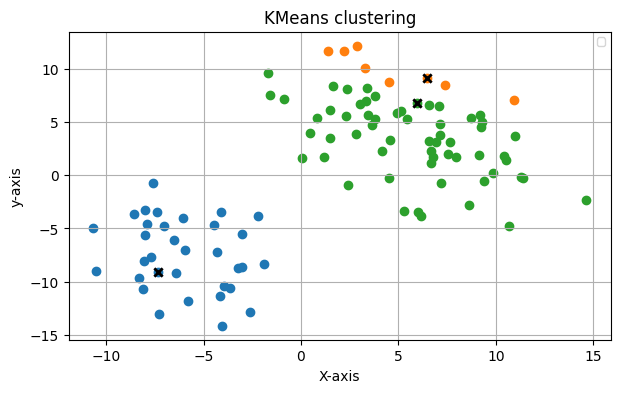

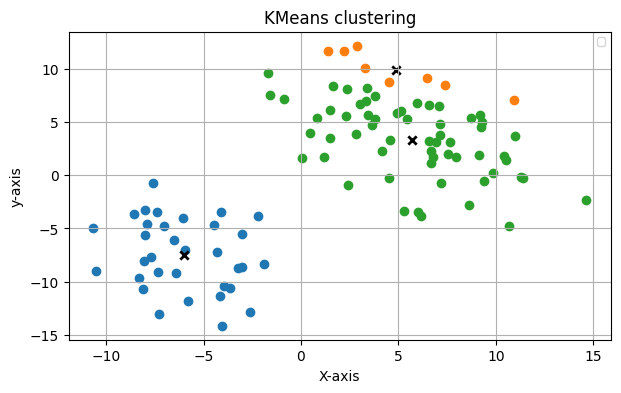

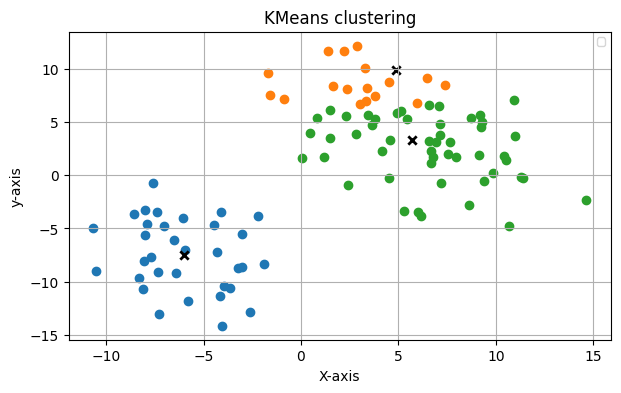

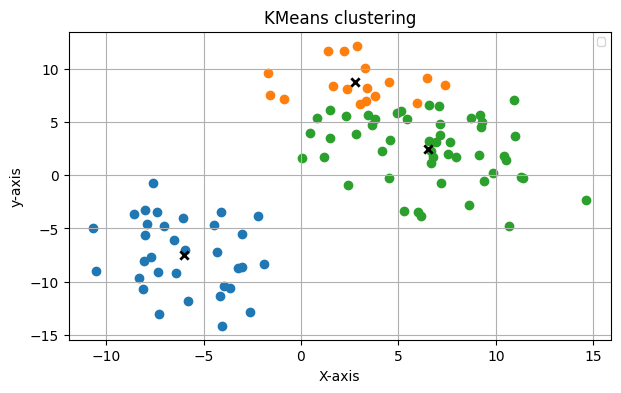

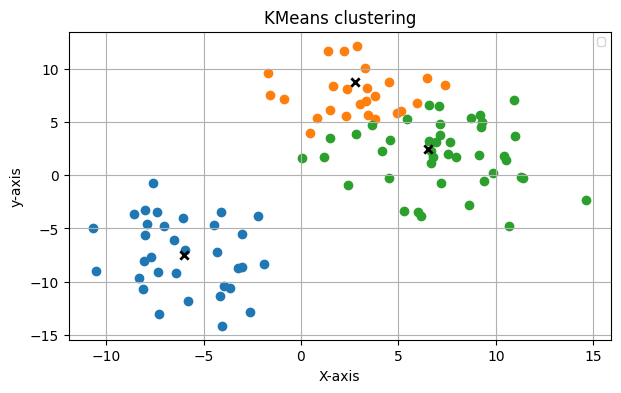

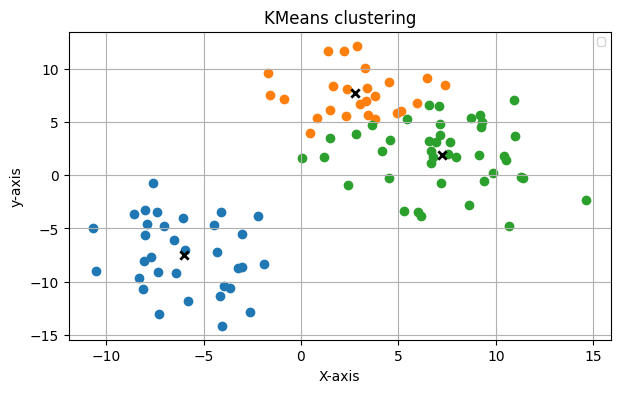

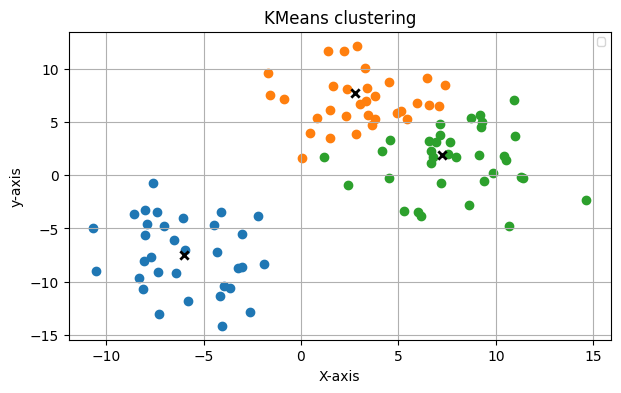

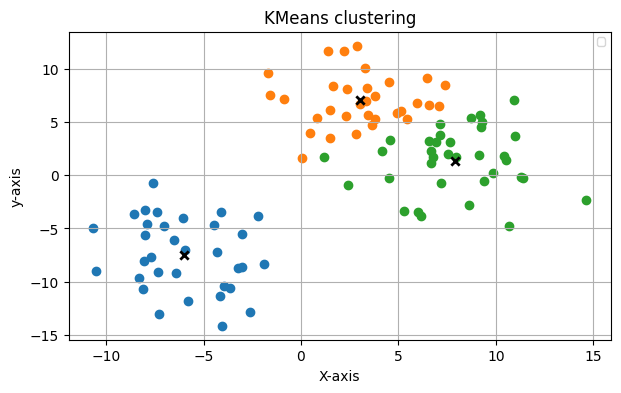

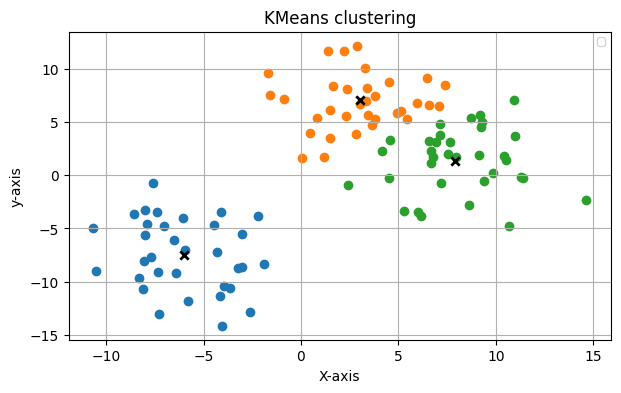

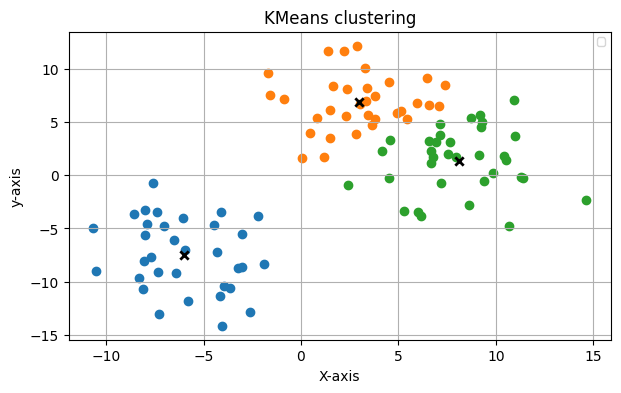

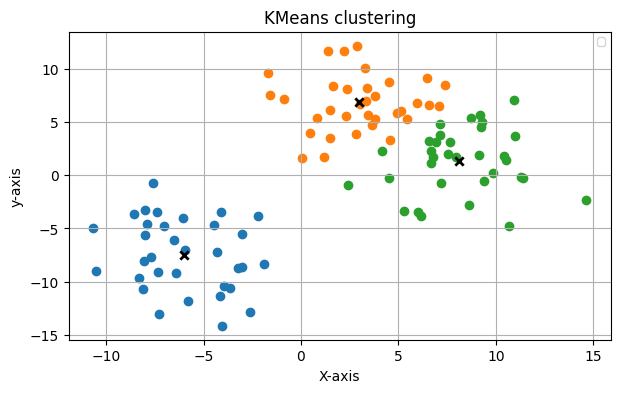

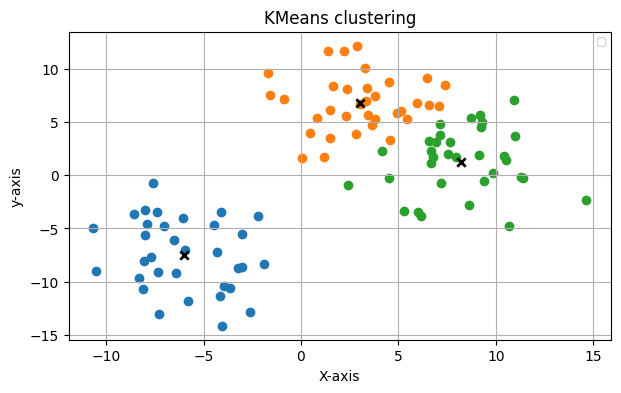

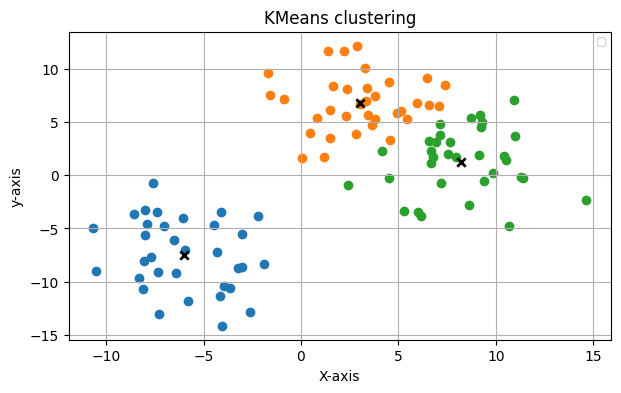

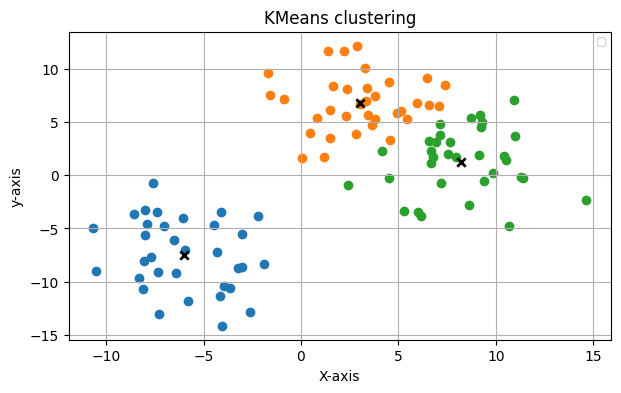

In [12]:
from sklearn.datasets import make_blobs
# Save the figures as gif using imageio
from matplotlib.animation import PillowWriter
m=100
X,y =make_blobs(n_samples=m, centers=3, n_features=2, cluster_std=2.5, random_state=142)
clusters=len(np.unique(y))
figs=[]
k=KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred=k.predict(X)
k.plot()
k.create_gif()

Here we don´t use the accuracy function because there is no y label pre-established. We did this with a blob. Let´s do this with the wine dataset. In this next example we will be able to use the accuracy correctly.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
wine=datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['Target'] = wine.target

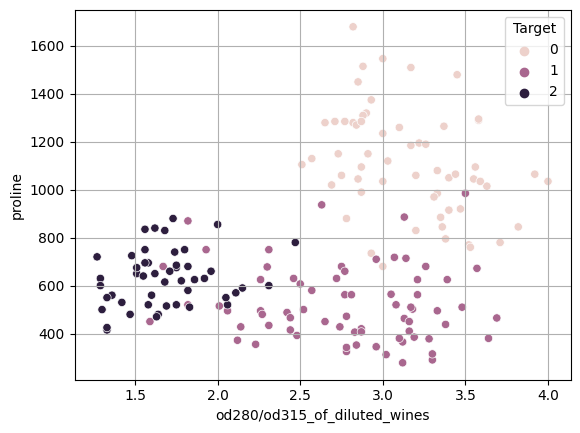

In [8]:
sns.scatterplot(data=df, x="od280/od315_of_diluted_wines", y="proline", hue="Target")
plt.grid()

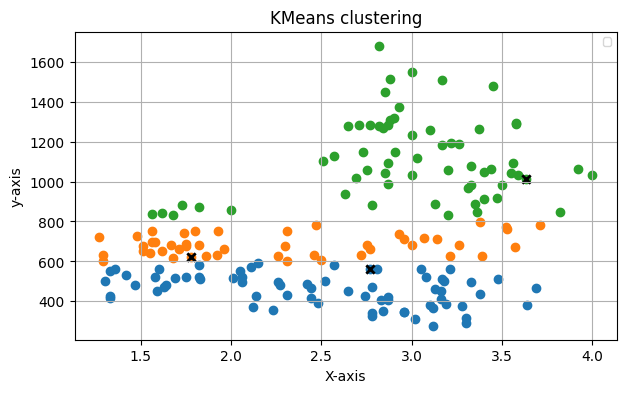

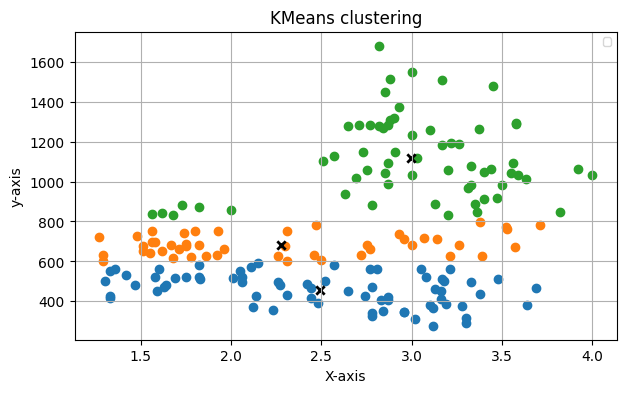

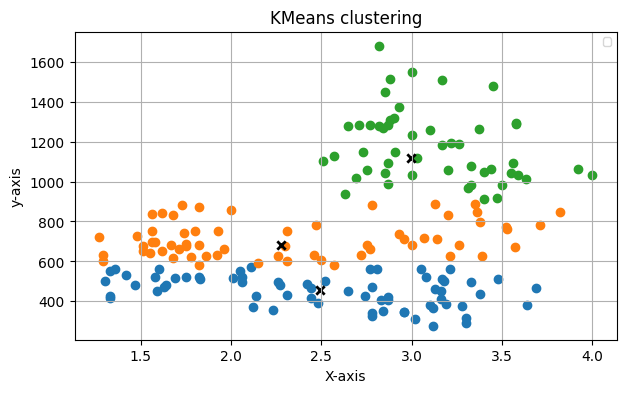

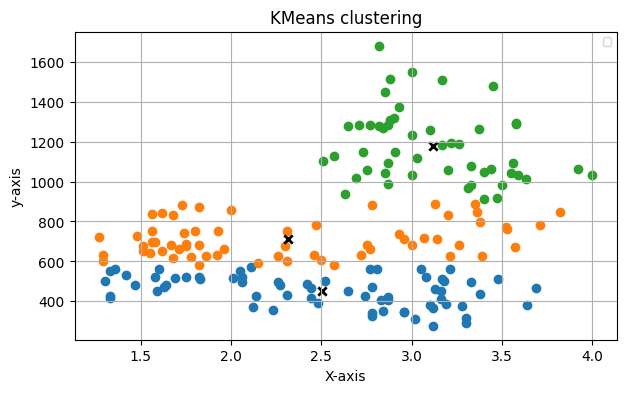

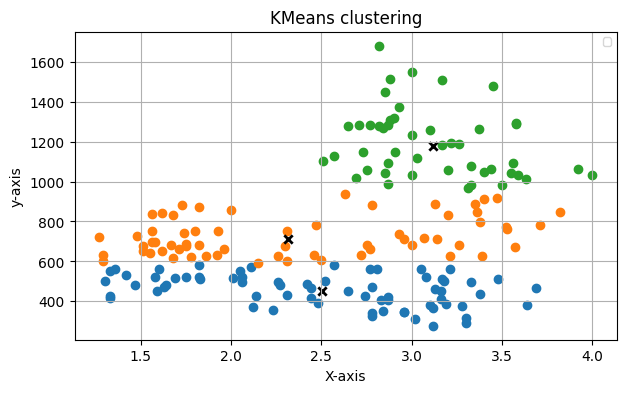

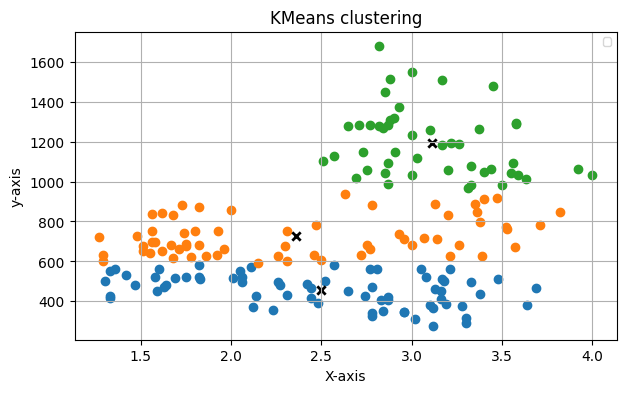

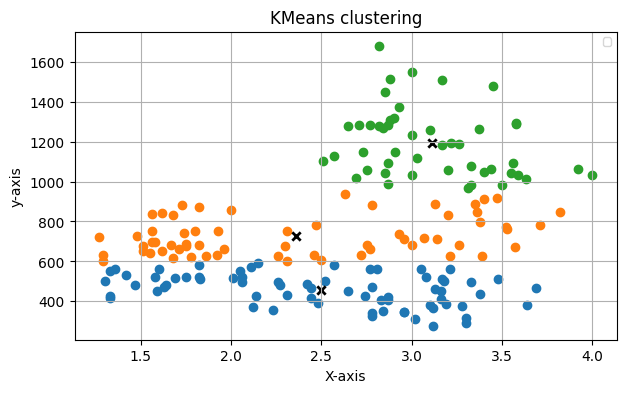

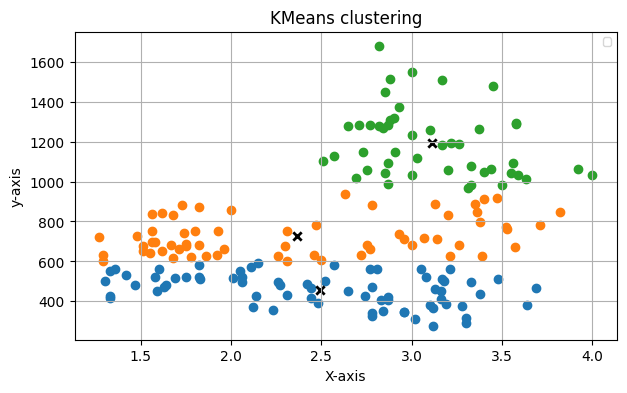

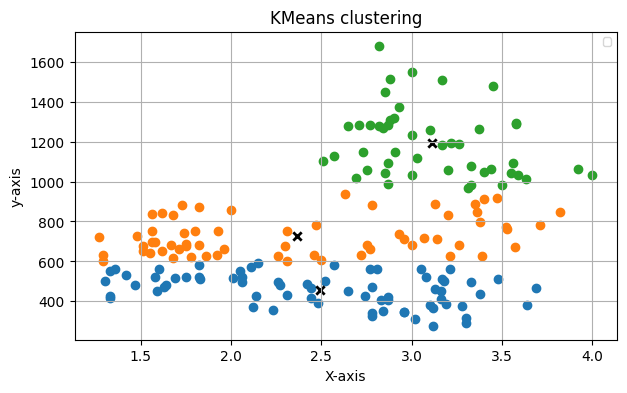

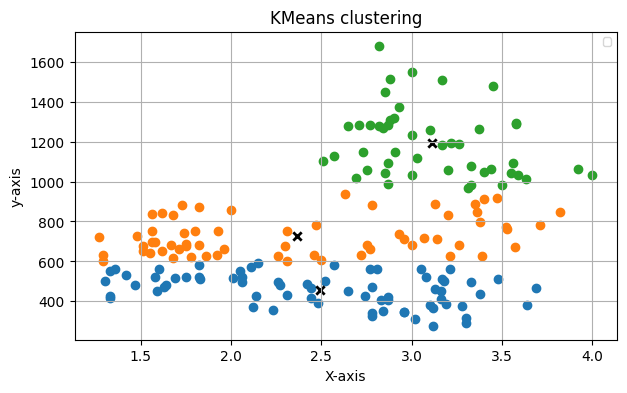

In [9]:
X=wine.data[:,[11,12]] #11 and 12 are the columns under study
y=wine.target #target are the categories of the wine
clusters=len(np.unique(y))
figs=[]
k=KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred=k.predict(X)
k.plot()
k.create_gif()

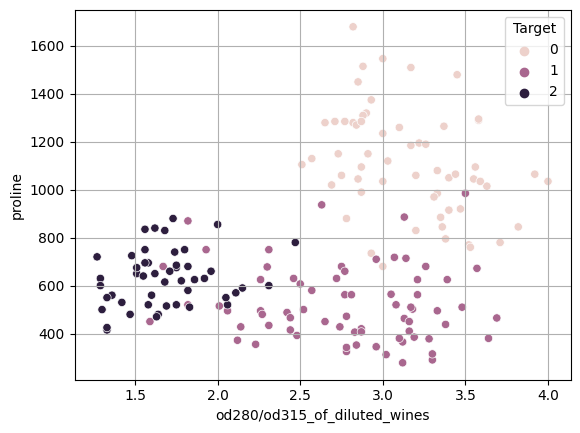

In [10]:
sns.scatterplot(data=df, x="od280/od315_of_diluted_wines", y="proline", hue="Target")
plt.grid()

The performance is not so good. For that we create a function called accuracy

In [11]:
acc=k.accuracy(y_pred,y)
print(acc)

0.11235955056179775


As we see, the accuracy is very low. We should find another way to optimize this clustering algorithm.


**Why is this happening? Shouldn´t it be with accuracy 90%?**



Well, K-means clustering works well with separated clusters of blobs.
As you can see in the previous simulation, it performed very well. Nonetheless, with the wine dataset performs very poor because it doesn´t have 3 blobs separated, they are very proximate between them.

K-means clustering makes as centroids the mean of all datapoints around a determined point doesn´t have any label to tell it if it is doing well or not. So takes as centroid the proportion with most points.

For that reason the performance of K-means clustering is very low in this example. You can observe the apparent difference when encountering a more separated blob situation.